## Time to learn ML with R script

#### Install the required R package

In [7]:
install.packages("caret", dependencies=c("Depends", "Suggests"))

Installing package into '/home/spark/shared/user-libs/R'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository https://cran.cnr.berkeley.edu/src/contrib:
  cannot open URL 'https://cran.cnr.berkeley.edu/src/contrib/PACKAGES'"Warning message:
"package 'caret' is not available (for R version 3.6.0)"

In [9]:
library(caret)

In [10]:
data("iris")
dataset <- iris

In [11]:
dataset <- read.csv('/project_data/data_asset/iris.csv', header=FALSE)

In [12]:
head(dataset)

V1,V2,V3,V4,V5
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


In [13]:
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

In [14]:
# Create a Validation Dataset
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
validation <- dataset[-validation_index,]
dataset <- dataset[validation_index,]

In [15]:
dim(dataset)

[1] 120   5

In [16]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [17]:
# View dataset once again
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa


In [18]:
# Level our classes
levels(dataset$Species)

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

### Summarize class distribution

In [19]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


In [20]:
# Summary Statistics
summary(dataset)

  Sepal.Length   Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.30   Min.   :2.000   Min.   :1.100   Min.   :0.100  
 1st Qu.:5.10   1st Qu.:2.800   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.80   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.85   Mean   :3.026   Mean   :3.779   Mean   :1.199  
 3rd Qu.:6.40   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.90   Max.   :4.100   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

### Dataset Visualization

In [21]:
# Split input and output; plots of each individual variable
x <- dataset[,1:4]
y <- dataset[,5]

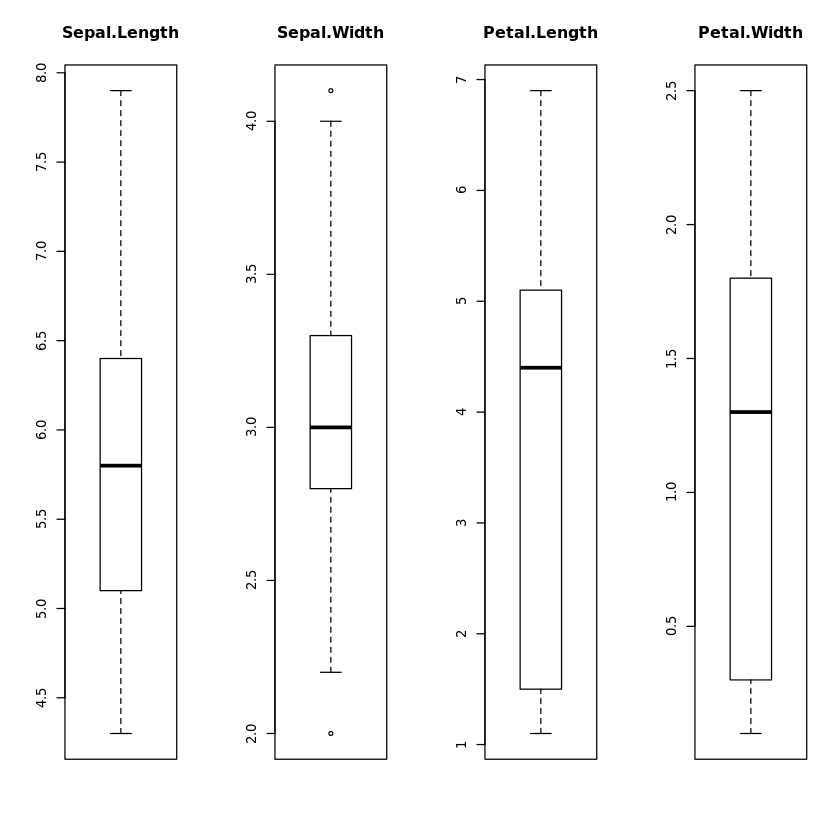

In [22]:
# boxplot
par(mfrow=c(1,4))

for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

In [25]:
# feature plots
install.packages("ellipse")

Installing package into '/home/spark/shared/user-libs/R'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository https://cran.cnr.berkeley.edu/src/contrib:
  cannot open URL 'https://cran.cnr.berkeley.edu/src/contrib/PACKAGES'"Warning message:
"package 'ellipse' is not available (for R version 3.6.0)"

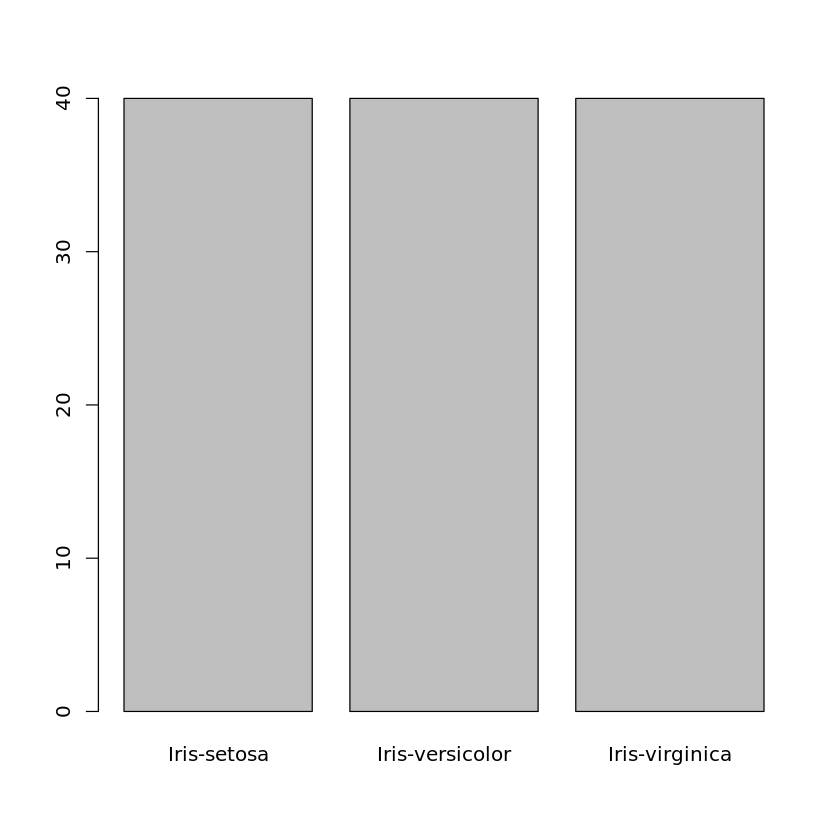

In [26]:
plot(y)

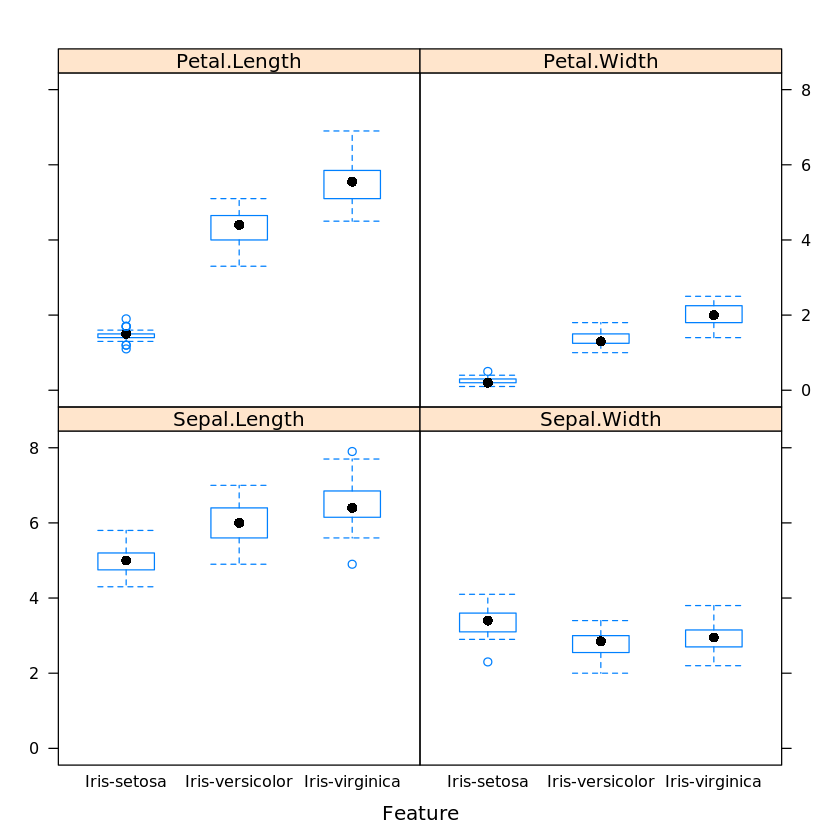

In [29]:
# featurePlot(x=x, y=y, plot="ellipse")
featurePlot(x=x, y=y, plot="box")

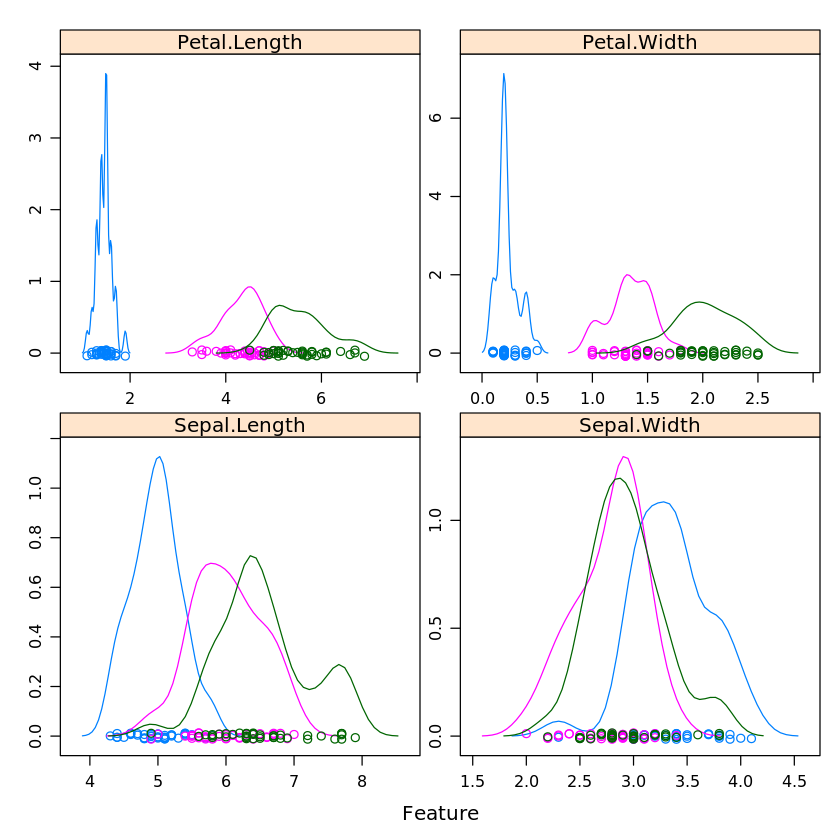

In [30]:
# Use probability density plots to give lines for each distribution
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [31]:
# Create models of the data and estimate the accuracy on unseen data
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### Build models

#### Evaluate 5 different algorithms:

* Linear Discriminant Analysis (LDA)
* Classification and Regression Trees (CART).
* k-Nearest Neighbors (kNN).
* Support Vector Machines (SVM) with a linear kernel.
* Random Forest (RF)

In [2]:
#install.packages('caret', dependencies = TRUE)
 install.packages("rsconnect")  
#install.packages("caretEnsemble")

Installing package into '/home/spark/shared/user-libs/R'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository https://cran.cnr.berkeley.edu/src/contrib:
  cannot open URL 'https://cran.cnr.berkeley.edu/src/contrib/PACKAGES'"Warning message:
"package 'rsconnect' is not available (for R version 3.6.0)"

In [43]:
install.packages('caret', repos='http://cran.cnr.berkeley.edu/src/contrib:')

Installing package into '/home/spark/shared/user-libs/R'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://cran.cnr.berkeley.edu/src/contrib:/src/contrib:
  cannot open URL 'http://cran.cnr.berkeley.edu/src/contrib:/src/contrib/PACKAGES'"Warning message:
"package 'caret' is not available (for R version 3.6.0)"

In [52]:
# install.packages('e1071', dependencies=TRUE)
#install.packages('e1071', repos='http://cran.cnr.berkeley.edu/src/contrib:')
install.packages("e1071", dependencies = T)

Installing package into '/home/spark/shared/user-libs/R'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository https://cran.cnr.berkeley.edu/src/contrib:
  cannot open URL 'https://cran.cnr.berkeley.edu/src/contrib/PACKAGES'"Warning message:
"package 'e1071' is not available (for R version 3.6.0)"

In [47]:
 library(plyr)
 library(caret) 
 library(e1071) 
 library(randomForest) 
 library(ggplot2)
 library(VIM) # for missing values
 library(corrplot)

ERROR: Error in library(e1071): there is no package called 'e1071'


In [51]:
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

ERROR: Error in requireNamespaceQuietStop("e1071"): package e1071 is required
